In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [115]:
cps_data = pd.read_csv("customer_segmentation.csv")
cps_df = pd.DataFrame(cps_data)
print(cps_df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [116]:
print("Describe:",cps_df.describe())
print("Info:",cps_df.info())

Describe:                  ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     

In [117]:
print(cps_df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [118]:
print(cps_df.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [119]:
for col in cps_df:
    print(cps_df[col].unique())

[5524 2174 4141 ... 7270 8235 9405]
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
[58138. 46344. 71613. ... 56981. 69245. 52869.]
[0 1 2]
[0 1 2]
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013'

In [120]:
cps_train, cps_test = train_test_split(cps_df, test_size=0.25,random_state=42)

In [121]:
cps_train["Age"] = [2025-i for i in cps_train["Year_Birth"]]
cps_test["Age"] = [2025-i for i in cps_test["Year_Birth"]]
print(cps_train)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1315   6197        1962         PhD         Single  27238.0        1   
2220   6261        1979  Graduation        Married  58025.0        0   
889    2930        1978      Master         Single  68092.0        0   
780    3194        1974         PhD         Single  71466.0        0   
2021   6214        1982      Master        Married  43815.0        1   
...     ...         ...         ...            ...      ...      ...   
1638  10785        1969  Graduation        Married  44078.0        1   
1095   9964        1979  Graduation         Single  61825.0        0   
1130   3412        1951      Master        Married  67381.0        0   
1294   2811        1963         PhD         Single  48918.0        1   
860    4297        1969  Graduation       Together  23228.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
1315         1  20-04-2013       39        37  ...             0   

In [122]:
cps_train["Marital_Status"]= cps_train["Marital_Status"].replace({"Together":"Married","Widow":"Divorced","Alone":"Single","YOLO":"Absurd"})
cps_train["Education"]= cps_train["Education"].replace({"2n Cycle":"Master"})
cps_test["Marital_Status"]= cps_test["Marital_Status"].replace({"Together":"Married","Widow":"Divorced","Alone":"Single","YOLO":"Absurd"})
cps_test["Education"]= cps_test["Education"].replace({"2n Cycle":"Master"})
print(cps_train.nunique())

ID                     1680
Year_Birth               56
Education                 4
Marital_Status            4
Income                 1523
Kidhome                   3
Teenhome                  3
Dt_Customer             629
Recency                 100
MntWines                666
MntFruits               152
MntMeatProducts         504
MntFishProducts         172
MntSweetProducts        169
MntGoldProds            201
NumDealsPurchases        15
NumWebPurchases          14
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Age                      56
dtype: int64


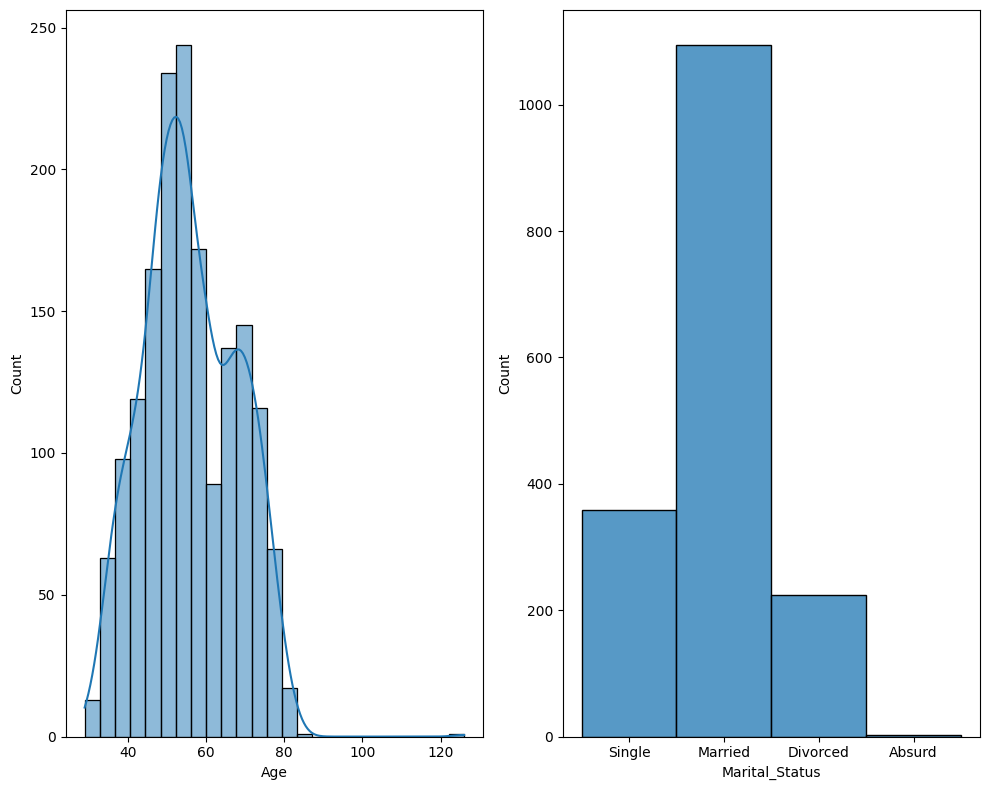

In [123]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.histplot(cps_train["Age"],kde=True,bins=25)
plt.subplot(1,2,2)
sns.histplot(cps_train["Marital_Status"])
plt.tight_layout()
plt.show()

In [124]:
cps_oe = OrdinalEncoder(categories=[["Basic", "Graduation", "Master", "PhD"]])

cps_train["Education"] = cps_oe.fit_transform(cps_train[["Education"]])
cps_test["Education"] = cps_oe.transform(cps_test[["Education"]])

marital_mapping = {"Absurd":0, "Single":1, "Married":2, "Divorced":3}
cps_train["Marital_Status"] = cps_train["Marital_Status"].map(marital_mapping)
cps_test["Marital_Status"] = cps_test["Marital_Status"].map(marital_mapping)

cps_train.drop(columns=["ID","Year_Birth","Dt_Customer","Z_Revenue"],inplace=True)
cps_test.drop(columns=["ID","Year_Birth","Dt_Customer","Z_Revenue"],inplace=True)
print(cps_train.head())

      Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1315        3.0               1  27238.0        1         1       39   
2220        1.0               2  58025.0        0         1       81   
889         2.0               1  68092.0        0         0        7   
780         3.0               1  71466.0        0         0       86   
2021        2.0               2  43815.0        1         0       53   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
1315        37          0               17                0  ...   
2220       270         31               88               11  ...   
889        852         60              207               78  ...   
780        412         12              546               78  ...   
2021        14         10               29                4  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1315                  9             0             0             0   
2220                

In [125]:
cps_impute = SimpleImputer(strategy="mean")
cps_train["Income"] = cps_impute.fit_transform(cps_train[["Income"]])
cps_test["Income"] = cps_impute.transform(cps_test[["Income"]])
print(cps_train["Income"].isnull().sum())

0


In [126]:
std_col = ["Income","Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
           "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4",
           "AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Z_CostContact","Response","Age"]
cps_std = StandardScaler()
cps_train[std_col] = cps_std.fit_transform(cps_train[std_col])
cps_test[std_col] = cps_std.transform(cps_test[std_col])
print(cps_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1680 entries, 1315 to 860
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1680 non-null   float64
 1   Marital_Status       1680 non-null   int64  
 2   Income               1680 non-null   float64
 3   Kidhome              1680 non-null   float64
 4   Teenhome             1680 non-null   float64
 5   Recency              1680 non-null   float64
 6   MntWines             1680 non-null   float64
 7   MntFruits            1680 non-null   float64
 8   MntMeatProducts      1680 non-null   float64
 9   MntFishProducts      1680 non-null   float64
 10  MntSweetProducts     1680 non-null   float64
 11  MntGoldProds         1680 non-null   float64
 12  NumDealsPurchases    1680 non-null   float64
 13  NumWebPurchases      1680 non-null   float64
 14  NumCatalogPurchases  1680 non-null   float64
 15  NumStorePurchases    1680 non-null   floa

In [127]:
kmeans_col = ["Income","Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
           "NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4",
           "AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Z_CostContact","Response","Age"]
print(cps_train[kmeans_col].isnull().sum())

Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Response               0
Age                    0
dtype: int64


In [128]:
pca = PCA(n_components=2)
train_reduced = pca.fit_transform(cps_train[kmeans_col])
test_reduced = pca.transform(cps_test[kmeans_col])
print(train_reduced)

[[-2.85886485  0.65858904]
 [ 0.14922437  0.99691672]
 [ 1.88329911 -0.2116559 ]
 ...
 [ 0.46822856  1.85392944]
 [-2.17785928  0.18119424]
 [-2.78008298 -0.75521036]]


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(train_reduced)
train_label = kmeans.predict(train_reduced)
score_kmeans = silhouette_score(train_reduced, train_label)
print("Silhouette Score:", score_kmeans)
test_label = kmeans.predict(test_reduced)
score_test = silhouette_score(test_reduced, test_label)
print("Silhouette Score (Test):", score_test)

Silhouette Score: 0.5384383352439747
Silhouette Score (Test): 0.508133426300997


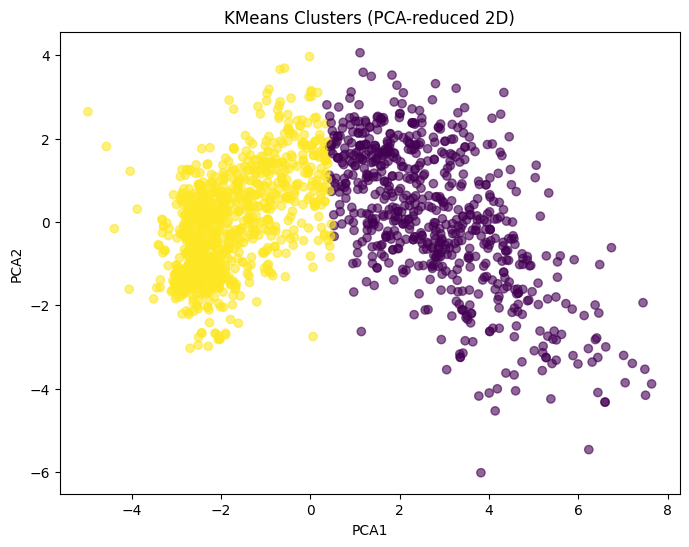

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0], train_reduced[:,1], c=train_label, cmap='viridis', alpha=0.6)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("KMeans Clusters (PCA-reduced 2D)")
plt.show()

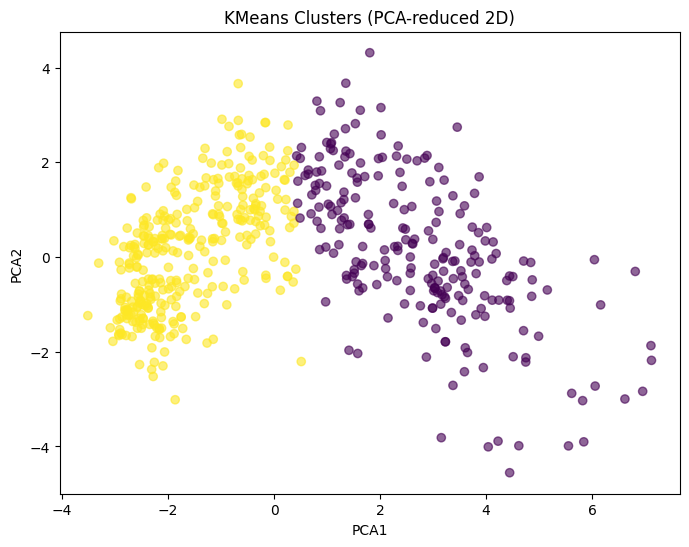

In [135]:
plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:,0], test_reduced[:,1], c=test_label, cmap='viridis', alpha=0.6)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("KMeans Clusters (PCA-reduced 2D)")
plt.show()

In [ ]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
train_label = agg.fit_predict(train_reduced)
score_agg_train = silhouette_score(train_reduced, train_label)
print("Silhouette Score Agglomerative:", score_agg_train)

Silhouette Score Agglomerative: 0.4841295564428776
Silhouette Score Agglomerative: 0.492053234677729


In [132]:
db = DBSCAN(eps=1.5, min_samples=5)
train_labels = db.fit_predict(train_reduced)

score_db = silhouette_score(train_reduced, train_labels)
print("Silhouette Score (DBSCAN):", score_db)

Silhouette Score (DBSCAN): 0.4784574596487343


In [ ]:
import pickle

# Save StandardScaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(cps_std, f)  # cps_std is your fitted StandardScaler

# Save PCA for clustering
with open("pca_cluster.pkl", "wb") as f:
    pickle.dump(pca, f)  # pca is your fitted PCA for clustering

# Save PCA for 2D visualization
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
train_2d = pca_2d.fit_transform(cps_train[kmeans_col])
with open("pca_2d.pkl", "wb") as f:
    pickle.dump(pca_2d, f)

# Save KMeans model
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(train_reduced)  # train_reduced = PCA-transformed train data
with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Save OrdinalEncoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(cps_oe, f)
